In [1]:
import pandas as pd
import sqlite3

In [2]:
pd.set_option('display.max_rows', 10)

In [3]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [105]:
query = """
select *
from checker
where uid like 'user_%'
"""

ch = pd.read_sql_query(query, conn, parse_dates=['timestamp'])
ch['hour'] = ch['timestamp'].dt.hour
ch['date'] = ch['timestamp'].dt.date
ch['weekday'] = ch['timestamp'].dt.weekday
ch['type'] = ch['weekday'].apply(lambda row: 'work' if row < 5 else 'weekend')

week = ch.groupby(['type', 'date', 'hour']).agg(commits=('hour', 'count')).reset_index()
week

,type,date,hour,commits
0,weekend,2020-04-18,7,1
1,weekend,2020-04-18,13,5
2,weekend,2020-04-18,14,3
3,weekend,2020-04-18,15,25
4,weekend,2020-04-18,17,7
...,...,...,...,...
283,work,2020-05-21,16,4
284,work,2020-05-21,17,1
285,work,2020-05-21,18,2
286,work,2020-05-21,19,8


In [106]:
weekend_avg = week[week['type'] == 'weekend'].groupby('hour').agg({'commits':'mean'})
weekend_avg

,commits
hour,
0,2.000000
1,6.000000
3,1.000000
5,2.000000
7,4.000000
...,...
19,13.125000
20,13.000000
21,10.285714


In [107]:
workdays_avg = week[week['type'] == 'work'].groupby('hour').agg({'commits':'mean'})
workdays_avg

,commits
hour,
0,3.000000
3,2.000000
5,7.500000
6,1.500000
7,5.166667
...,...
19,17.833333
20,14.076923
21,24.333333


In [114]:
week = pd.merge(weekend_avg, workdays_avg, how='inner', on='hour', suffixes=('_weekend', '_work'))
week

,commits_weekend,commits_work
hour,,
0,2.000000,3.000000
3,1.000000,2.000000
5,2.000000,7.500000
7,4.000000,5.166667
8,7.000000,3.700000
...,...,...
19,13.125000,17.833333
20,13.000000,14.076923
21,10.285714,24.333333


array([<Axes: title={'center': 'commits_weekend'}, xlabel='hour'>,
       <Axes: title={'center': 'commits_work'}, xlabel='hour'>],
      dtype=object)

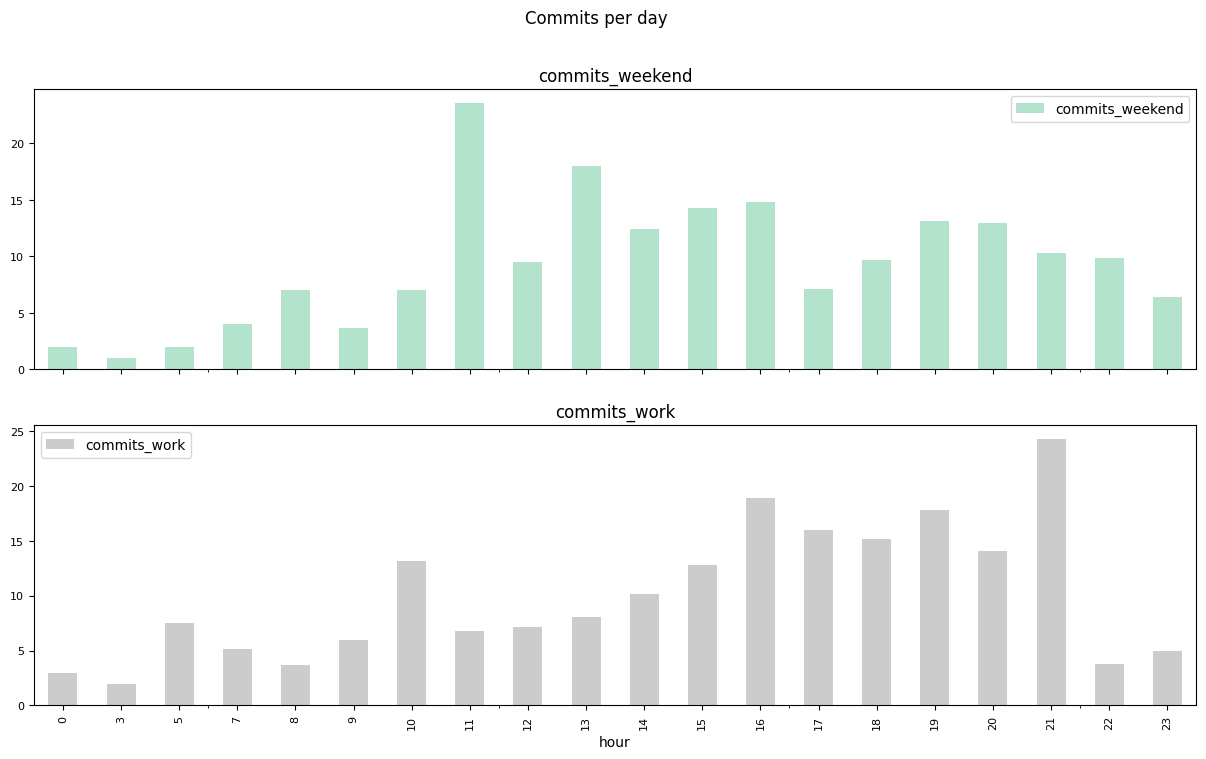

In [129]:
week.plot(
    kind='bar',
    title='Commits per day',
    fontsize=8,
    figsize=(15,8),
    subplots=True,
    colormap='Pastel2'
)